<a href="https://colab.research.google.com/github/faisalalh1122/BootCampT5/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [6]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.shape

(12316, 32)

In [11]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9926,12:15:00,Sunday,31-50,Male,Elementary school,Employee,5-10yr,Stationwagen,Owner,Below 1yr,...,Going straight,Driver or rider,Male,Under 18,3,Employee,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [10]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [9]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [12]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [16]:

numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
categorical_cols = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
    'Fitness_of_casuality'
]


df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


df.isnull().sum()


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']


scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df[numerical_cols].head()

,Number_of_vehicles_involved,Number_of_casualties
0,0.166667,0.142857
1,0.166667,0.142857
2,0.166667,0.142857
3,0.166667,0.142857
4,0.166667,0.142857


In [21]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


categorical_cols = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
    'Fitness_of_casuality', 'Day_of_week', 'Age_band_of_driver',
    'Sex_of_driver', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
    'Cause_of_accident', 'Accident_severity'
]


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


df[categorical_cols].head()


,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Day_of_week,Age_band_of_driver,Sex_of_driver,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,0,0,0,3,3,2,9,2,5,...,1,0,1,3,2,5,3,5,9,2
1,4,0,3,11,3,2,2,6,4,5,...,1,1,1,3,2,5,3,5,16,2
2,4,0,0,5,3,5,2,1,6,5,...,1,0,1,0,1,1,2,5,0,1
3,4,0,2,11,0,5,2,6,6,6,...,3,0,1,2,0,0,2,5,1,2
4,4,0,1,0,3,2,2,4,6,5,...,3,0,1,3,2,5,3,5,16,2


In [23]:

one_hot_encoded_df = pd.get_dummies(df, columns=[
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
    'Fitness_of_casuality', 'Day_of_week', 'Age_band_of_driver',
    'Sex_of_driver', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
    'Cause_of_accident', 'Accident_severity'
], drop_first=True)


one_hot_encoded_df.head()




,Time,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Educational_level_1,Educational_level_2,Educational_level_3,Educational_level_4,...,Cause_of_accident_12,Cause_of_accident_13,Cause_of_accident_14,Cause_of_accident_15,Cause_of_accident_16,Cause_of_accident_17,Cause_of_accident_18,Cause_of_accident_19,Accident_severity_1,Accident_severity_2
0,17:02:00,Dry,Daylight,Normal,0.166667,0.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,17:02:00,Dry,Daylight,Normal,0.166667,0.142857,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,17:02:00,Dry,Daylight,Normal,0.166667,0.142857,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1:06:00,Dry,Darkness - lights lit,Normal,0.166667,0.142857,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,1:06:00,Dry,Darkness - lights lit,Normal,0.166667,0.142857,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [24]:

numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']


def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


for col in numerical_cols:
    cap_outliers(df, col)


print(df[numerical_cols].describe())



       Number_of_vehicles_involved  Number_of_casualties
count                 1.231600e+04          12316.000000
mean                  1.666667e-01              0.068529
std                   2.775670e-17              0.112166
min                   1.666667e-01              0.000000
25%                   1.666667e-01              0.000000
50%                   1.666667e-01              0.000000
75%                   1.666667e-01              0.142857
max                   1.666667e-01              0.357143


In [25]:

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

df['Rush_Hour'] = df['Time'].dt.hour.isin([7, 8, 16, 17])

print(df[['Time', 'Rush_Hour']].head())


                 Time  Rush_Hour
0 1900-01-01 17:02:00       True
1 1900-01-01 17:02:00       True
2 1900-01-01 17:02:00       True
3 1900-01-01 01:06:00      False
4 1900-01-01 01:06:00      False


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

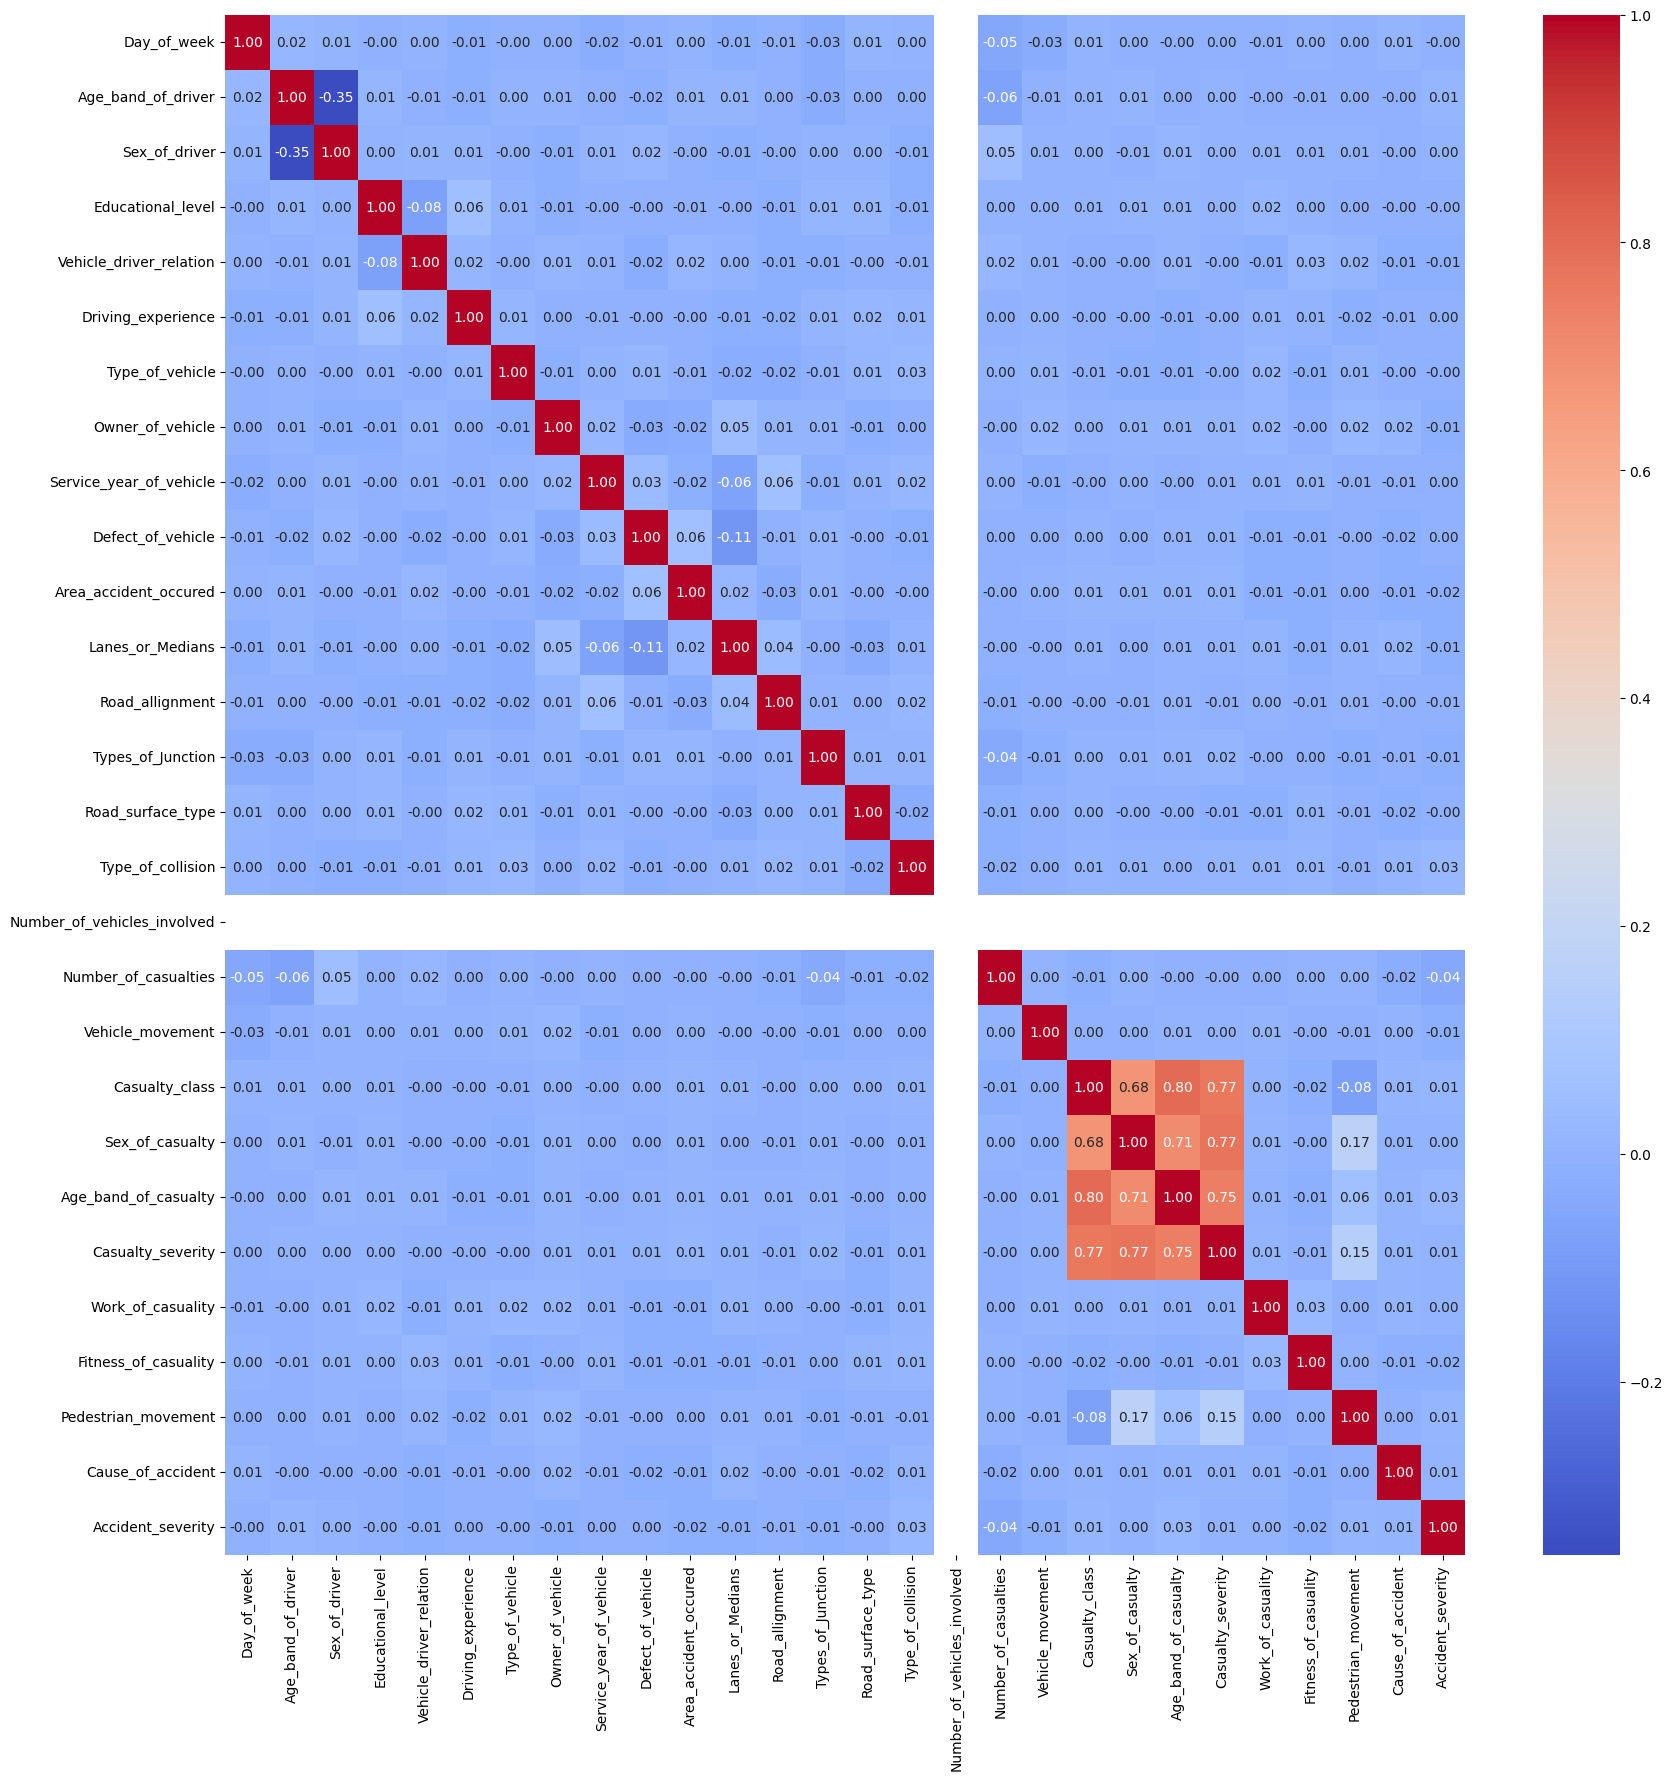

In [34]:


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


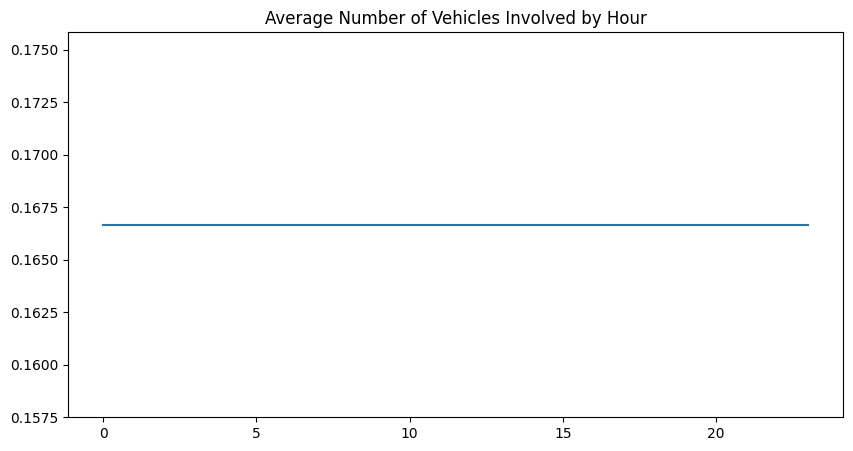

In [32]:
df['Hour'] = df['Time'].dt.hour

avg_vehicles_by_hour = df.groupby('Hour')['Number_of_vehicles_involved'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_vehicles_by_hour.index, avg_vehicles_by_hour.values)

plt.title('Average Number of Vehicles Involved by Hour')

plt.show()

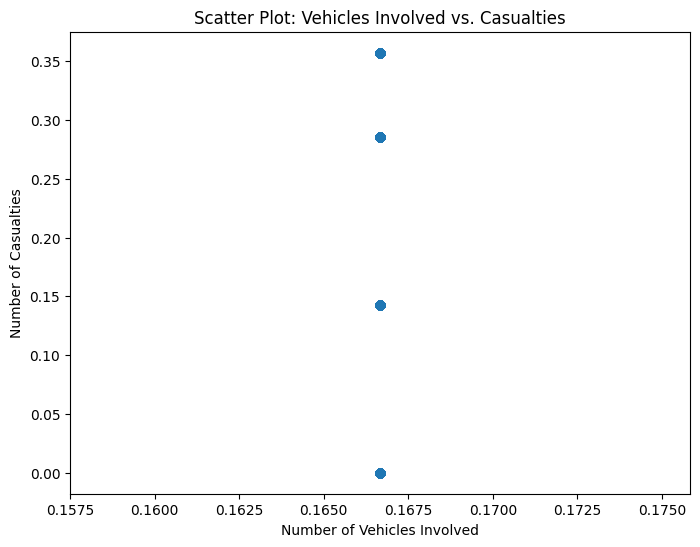

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Number_of_vehicles_involved'], df['Number_of_casualties'], alpha=0.5)
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.title('Scatter Plot: Vehicles Involved vs. Casualties')
plt.show()

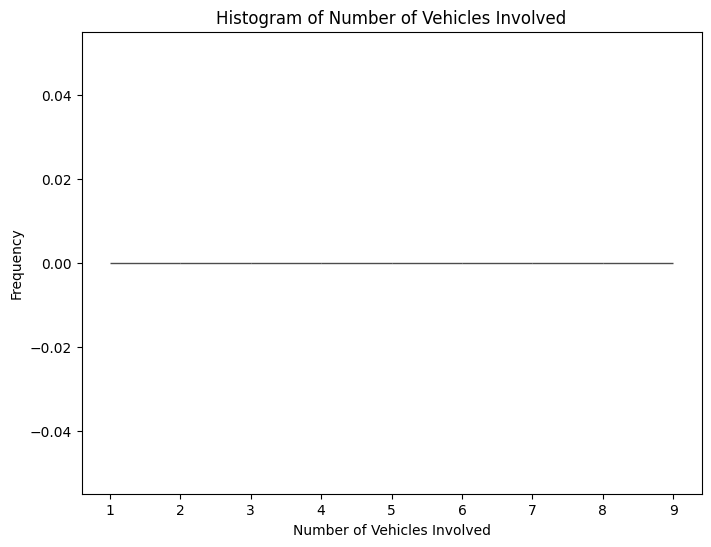

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df['Number_of_vehicles_involved'], bins=range(1, 10), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Vehicles Involved')
plt.show()

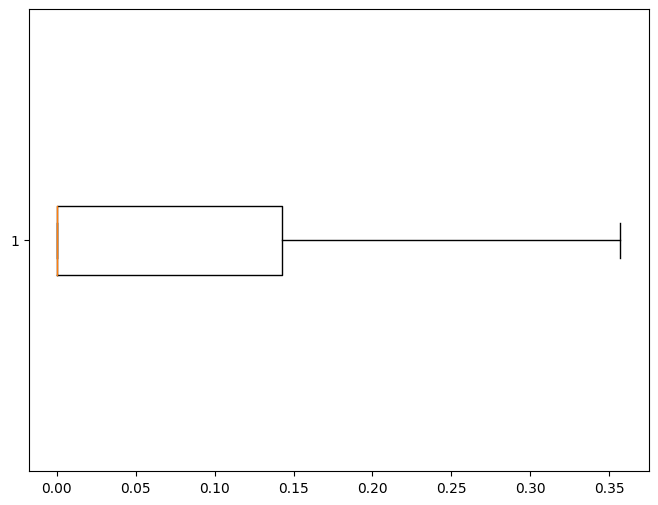

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Number_of_casualties'], vert=False)
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [41]:


label_encoder = LabelEncoder()
df['Accident_severity_encoded'] = label_encoder.fit_transform(df['Accident_severity'])

# Calculate the correlation matrix with the target variable
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['Accident_severity_encoded'].sort_values(ascending=False)
print("Correlation with Accident_severity:")
print(correlations_with_target)

ValueError: could not convert string to float: 'Dry'

In [42]:

label_encoder = LabelEncoder()


categorical_cols = df.select_dtypes(include=['object']).columns


df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


print(df_encoded[categorical_cols].head())

   Road_surface_conditions  Light_conditions  Weather_conditions
0                        0                 3                   2
1                        0                 3                   2
2                        0                 3                   2
3                        0                 0                   2
4                        0                 0                   2


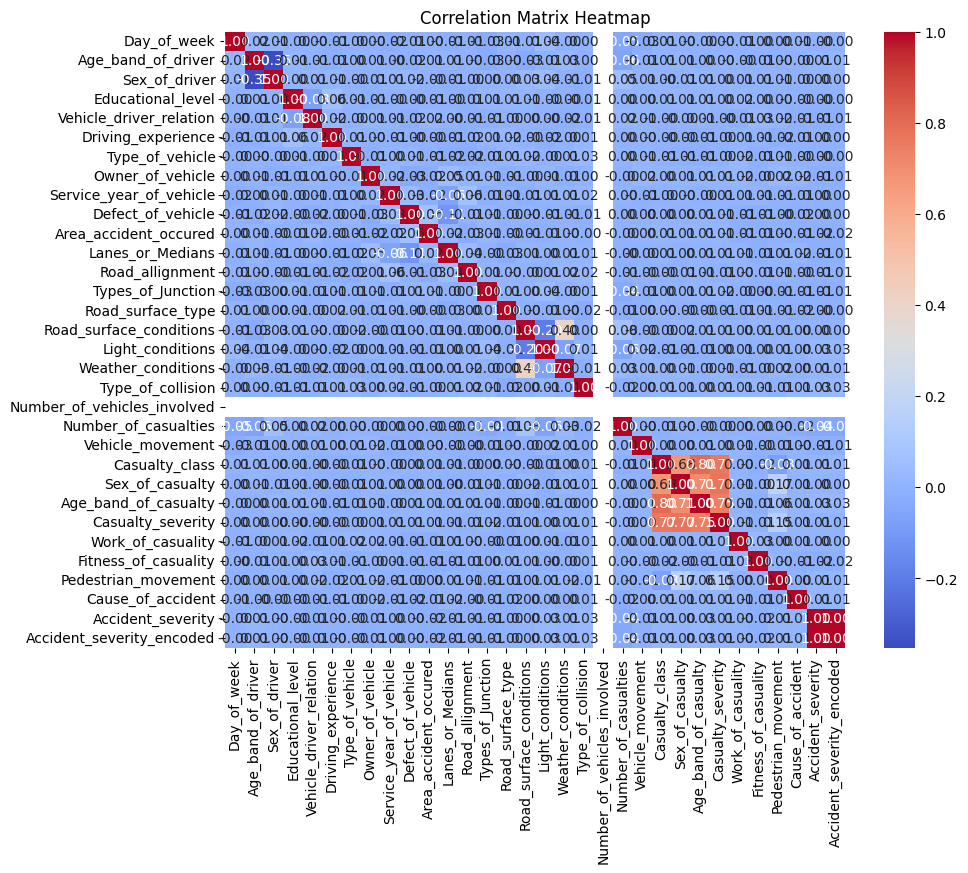

In [43]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df_encoded[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [44]:

final_selected_features = [
    'Number_of_vehicles_involved',
    'Number_of_casualties',
    'Hour',  # Extracted from 'Time'
    'Road_surface_conditions',
    'Weather_conditions',
    'Driving_experience',
    'Area_accident_occured'
]


target_variable = 'Accident_severity_encoded'

X = df_encoded[final_selected_features]
y = df_encoded[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (9852, 7), y_train: (9852,)
Testing set shape: X_test: (2464, 7), y_test: (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


final_selected_features = [
    'Number_of_vehicles_involved',
    'Number_of_casualties',
    'Hour',  # Extracted from 'Time'
    'Road_surface_conditions',
    'Weather_conditions',
    'Driving_experience',
    'Area_accident_occured'
]

target_variable = 'Accident_severity_encoded'

X = df_encoded[final_selected_features]
y = df_encoded[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

y_pred_proba = logistic_model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.84
Confusion Matrix:
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

ROC AUC Score: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [50]:

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train_scaled, y_train)

y_pred_tree = decision_tree_model.predict(X_test_scaled)


accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)



# Print evaluation metrics
print(f"Accuracy (Decision Tree): {accuracy_tree:.2f}")
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_tree)
print("Classification Report (Decision Tree):")
print(class_report_tree)


y_pred_proba_tree = decision_tree_model.predict_proba(X_test_scaled)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree, multi_class='ovr')

print(f"ROC AUC Score (Decision Tree): {roc_auc_tree:.2f}")


Accuracy (Decision Tree): 0.77
Confusion Matrix (Decision Tree):
[[   3    3   31]
 [   6   56  301]
 [  27  194 1843]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        37
           1       0.22      0.15      0.18       363
           2       0.85      0.89      0.87      2064

    accuracy                           0.77      2464
   macro avg       0.38      0.38      0.38      2464
weighted avg       0.74      0.77      0.76      2464

ROC AUC Score (Decision Tree): 0.55


#### Support Vector Machine (SVM)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


svm_model = SVC(kernel='linear', probability=True, random_state=42)


svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation metrics
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print("Classification Report (SVM):")
print(class_report_svm)


y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr')

print(f"ROC AUC Score (SVM): {roc_auc_svm:.2f}")


Accuracy (SVM): 0.84
Confusion Matrix (SVM):
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

ROC AUC Score (SVM): 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print evaluation metrics
print(f"Accuracy (KNN): {accuracy_knn:.2f}")
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
print("Classification Report (KNN):")
print(class_report_knn)


y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print(f"ROC AUC Score (KNN): {roc_auc_knn:.2f}")


Accuracy (KNN): 0.81
Confusion Matrix (KNN):
[[   0    6   31]
 [   3   16  344]
 [   2   79 1983]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.16      0.04      0.07       363
           2       0.84      0.96      0.90      2064

    accuracy                           0.81      2464
   macro avg       0.33      0.33      0.32      2464
weighted avg       0.73      0.81      0.76      2464

ROC AUC Score (KNN): 0.53


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Accuracy: 0.84
Confusion Matrix:
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

ROC AUC Score: 0.57


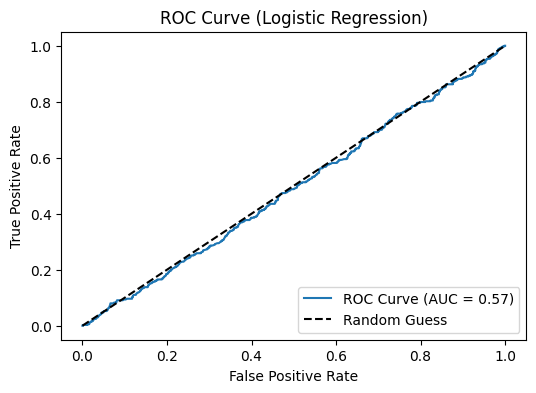


Model: Decision Tree
Accuracy: 0.77
Confusion Matrix:
[[   3    3   31]
 [   6   56  301]
 [  27  194 1843]]
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.08      0.08        37
           1       0.22      0.15      0.18       363
           2       0.85      0.89      0.87      2064

    accuracy                           0.77      2464
   macro avg       0.38      0.38      0.38      2464
weighted avg       0.74      0.77      0.76      2464

ROC AUC Score: 0.55


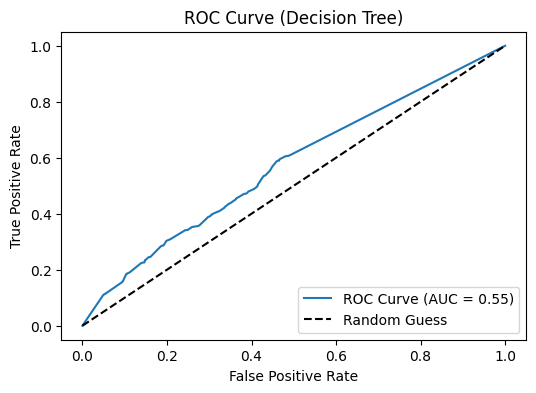

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: SVM
Accuracy: 0.84
Confusion Matrix:
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

ROC AUC Score: 0.47


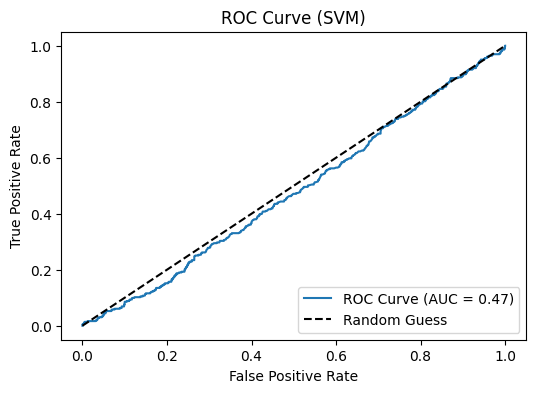


Model: K-Neighbors
Accuracy: 0.81
Confusion Matrix:
[[   0    6   31]
 [   3   16  344]
 [   2   79 1983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.16      0.04      0.07       363
           2       0.84      0.96      0.90      2064

    accuracy                           0.81      2464
   macro avg       0.33      0.33      0.32      2464
weighted avg       0.73      0.81      0.76      2464

ROC AUC Score: 0.53


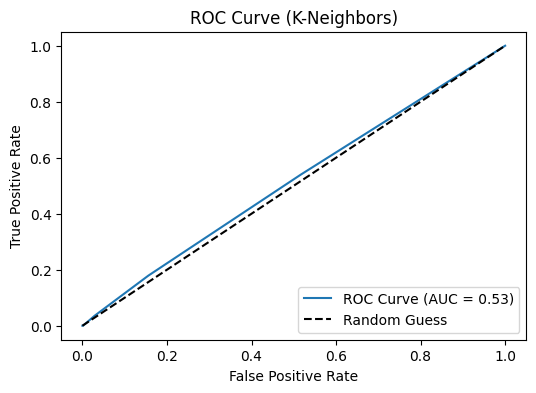

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "K-Neighbors": KNeighborsClassifier(n_neighbors=5)
}

def evaluate_model(y_test, y_pred, y_pred_proba, model_name="Model"):

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"ROC AUC Score: {roc_auc:.2f}")


    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc='lower right')
    plt.show()


for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)

    # Evaluate the model
    evaluate_model(y_test, y_pred, y_pred_proba, model_name=model_name)


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

1- Compare Metrics :

Logistic Regression:
High accuracy, balanced precision and recall.

Decision Tree:
Good accuracy but can overfit .

SVM (Support Vector Machine):
High accuracy, good with complex data .

K-Neighbors (KNN):
Decent accuracy

2- Evaluate Trade-offs:

Speed: Logistic Regression is the fastest and  SVM is slower with large data.

Ease of Use: Logistic Regression and Decision Tree are simple to use.

Understanding: Decision Tree

3- ustify Your Choice
Logistic Regression beacuase accurate and fast and .

4- Number of vehicles involved , Number of casualties , Road conditions.


